In [216]:
%pylab notebook
from pleque_test.testing_utils import load_testing_equilibrium
import pleque.utils.tools as tools
import numpy.linalg as lin
import pleque.utils.surfaces as surf
%load_ext autoreload

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [217]:
%autoreload 2

  nx = 65, ny = 129
197 1
--- No limiter specified. The IBA v3.1 limiter will be used.
---------------------------------
Equilibrium module initialization
---------------------------------
--- Generate 2D spline ---
--- Looking for extremes ---


<IPython.core.display.Javascript object>


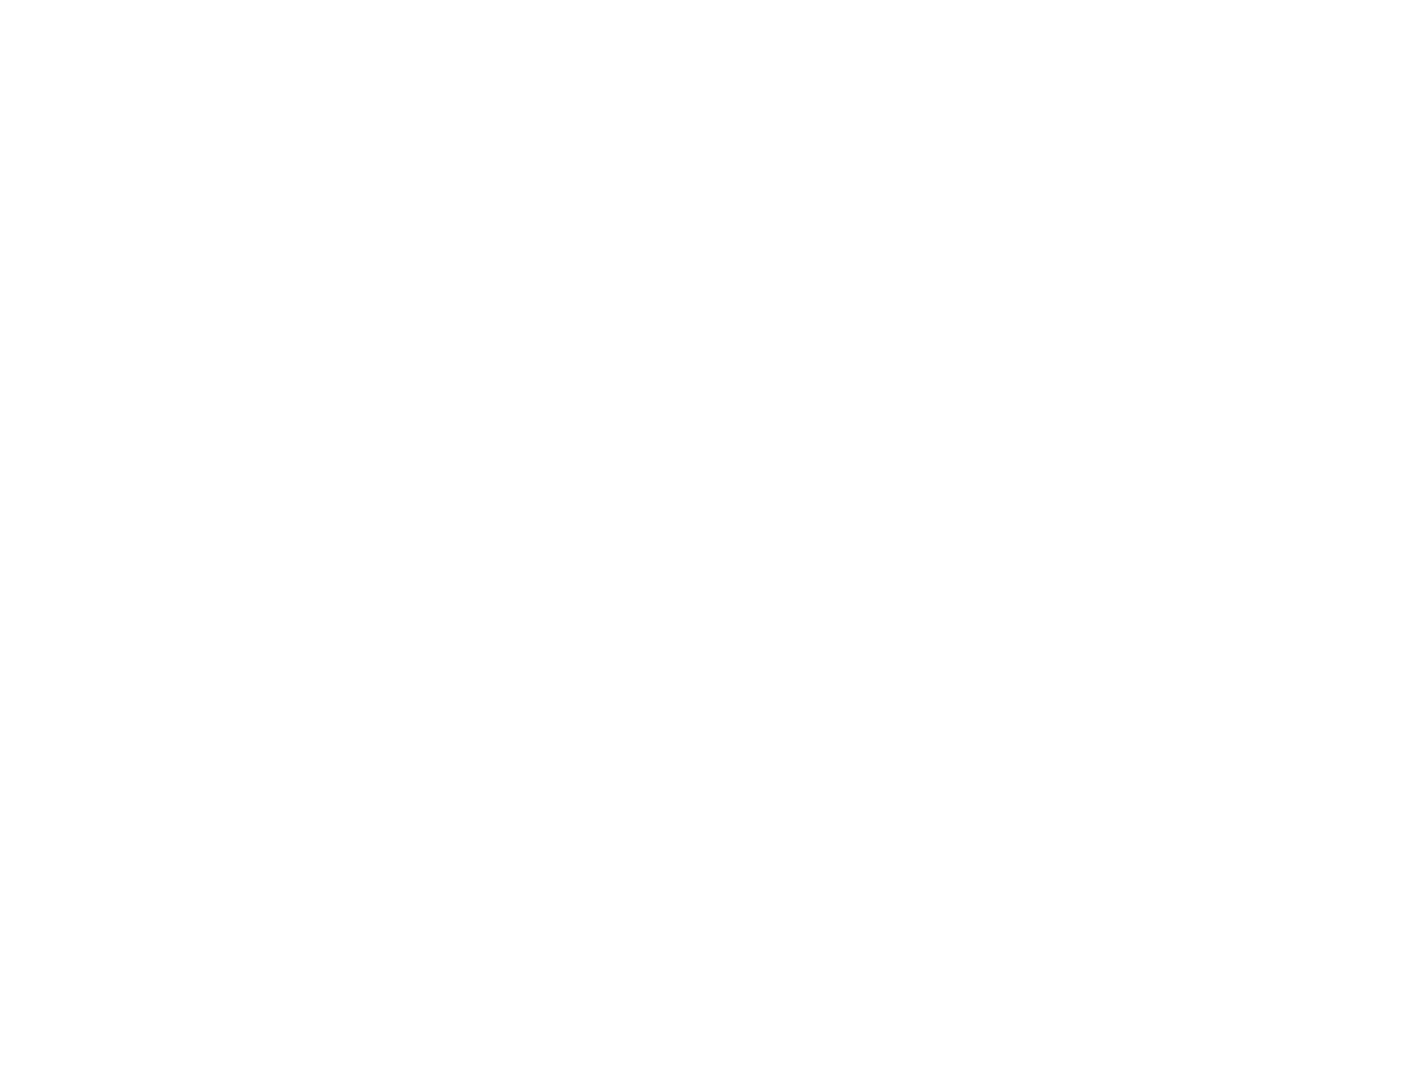

>>> lower x-point configuration found
--- Generate 1D splines ---
--- Mapping midplane to psi_n ---
--- Mapping pressure and f func to psi_n ---


In [218]:
eq = load_testing_equilibrium()

In [219]:
lcfs = eq.get_precise_lcfs()
figure()
plot(lcfs.R, lcfs.Z, 'r-')
eq.plot_overview()

AttributeError: 'Equilibrium' object has no attribute 'get_precise_lcfs'

In [202]:
xp = eq._x_point
g = eq.grid()

In [203]:
Hs = tools.hessian(eq._spl_psi, g.R, g.Z, grid=True)
print(Hs.shape)
Hs = np.swapaxes(Hs, 0, 2)
Hs = np.swapaxes(Hs, 1, 3)
print(Hs.shape)

ev_, evec_ = lin.eigh(Hs)
evec_.shape

(2, 2, 2000, 1000)
(2000, 1000, 2, 2)


(2000, 1000, 2, 2)

In [208]:
H = tools.hessian(eq._spl_psi, *xp)
ev, evec = lin.eig(H)
_, evec2 = lin.eigh(H)
print(H)
print(ev)
print(evec)
print(evec2)

evxp, mat = tools.xp_vecs(eq._spl_psi, *xp)
_, ev = lin.eig(mat)

print(evxp)
print(mat)

[[-2.44070355  1.87635688]
 [ 1.87635688  2.43942969]]
[-3.07872729  3.07745343]
[[-0.94676315 -0.32193096]
 [ 0.32193096 -0.94676315]]
[[-0.94676315 -0.32193096]
 [ 0.32193096 -0.94676315]]
[[ 1.20173341 -2.44070355]
 [-4.95444717 -2.44070355]]
[[-1.87635688 -2.43942969]
 [-2.44070355  1.87635688]]


<IPython.core.display.Javascript object>


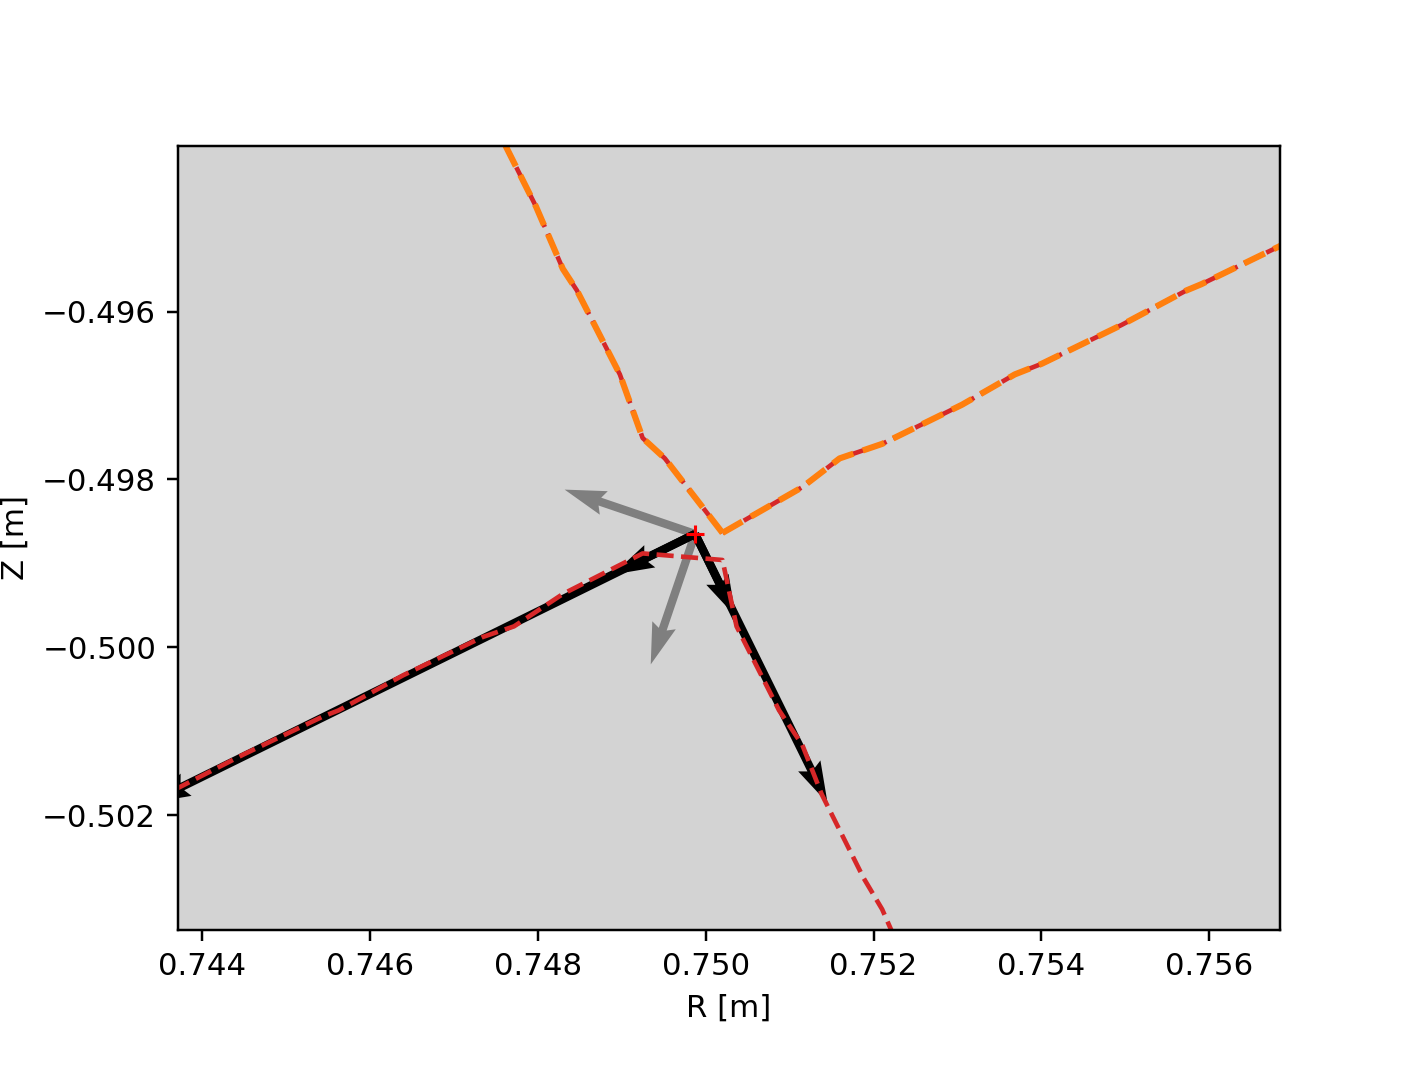

0.003109112450593088
2.7205141031613564


In [209]:
figure()
eq.plot_overview()

plot(*xp, 'r+')

contour(g.R, g.Z, g.psi, [eq.psi(*xp)[0]], colors='C3', linestyles='--')
quiver(*xp, *evec[:,0], scale=8, color='C7')
quiver(*xp, *evec[:,1], scale=8, color='C7')

quiver(*xp, *evxp[0], scale=10)
quiver(*xp, *evxp[1], scale=10)

quiver(*xp, *ev[:,0], scale=12)
quiver(*xp, *ev[:,1], scale=12)
#quiver(*g.mesh(), evec_[:,:,0,0], evec_[:,:,0,1])

print(evxp[0] @ evxp[1])
print(lin.norm(evxp[0]))


In [100]:
#t = surf.track_plasma_boundary(eq, eq._x_point)

equilibrium = eq

In [220]:
from pleque.utils.tools import xp_vecs
import numpy.linalg as la

evecs, _ = xp_vecs(equilibrium._spl_psi, *xp)
mg_axis = equilibrium._mg_axis

evec = evecs[0]

# if there is obtuse angle between line connecting x-point and mg axis and
# the separatrix branch multiply t
print(evec.dot(mg_axis - xp))
if evec.dot(mg_axis - xp) < 0:
    evec *= -1

evec /= la.norm(evec)
evec *= 1e-6

print(xp)
print(evec)
print(xp + evec)

br = equilibrium.B_R(*(xp + evec))[0]
bz = equilibrium.B_Z(*(xp + evec))[0]

bpol = np.square(np.array([br, bz]))
print(evec.shape)
print(bpol.shape)

direction = evec.dot(bpol)
print(direction)
trace = equilibrium.trace_field_line(*(xp + evec), direction=direction)
t = trace[0]
rs = t.R
zs = t.Z
rs = np.hstack((rs[-1], rs))
zs = np.hstack((zs[-1], zs))
t = equilibrium._as_fluxsurface(rs, zs)



ImportError: cannot import name 'xp_vecs'

In [189]:
t.R.shape

(907,)

<IPython.core.display.Javascript object>


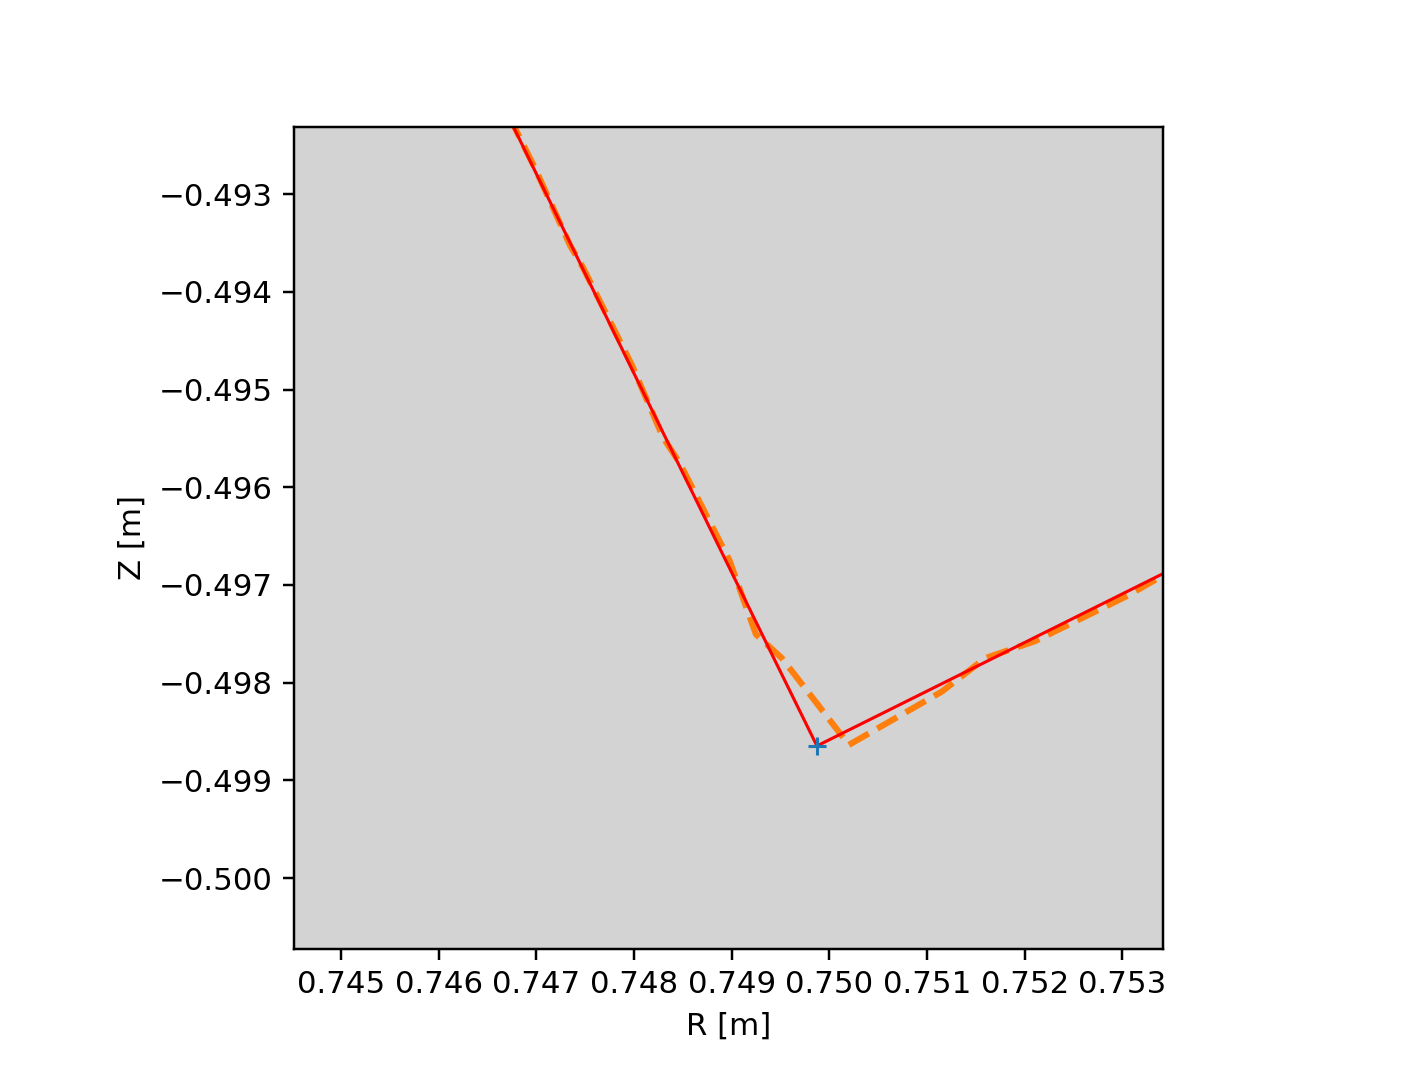

<IPython.core.display.Javascript object>


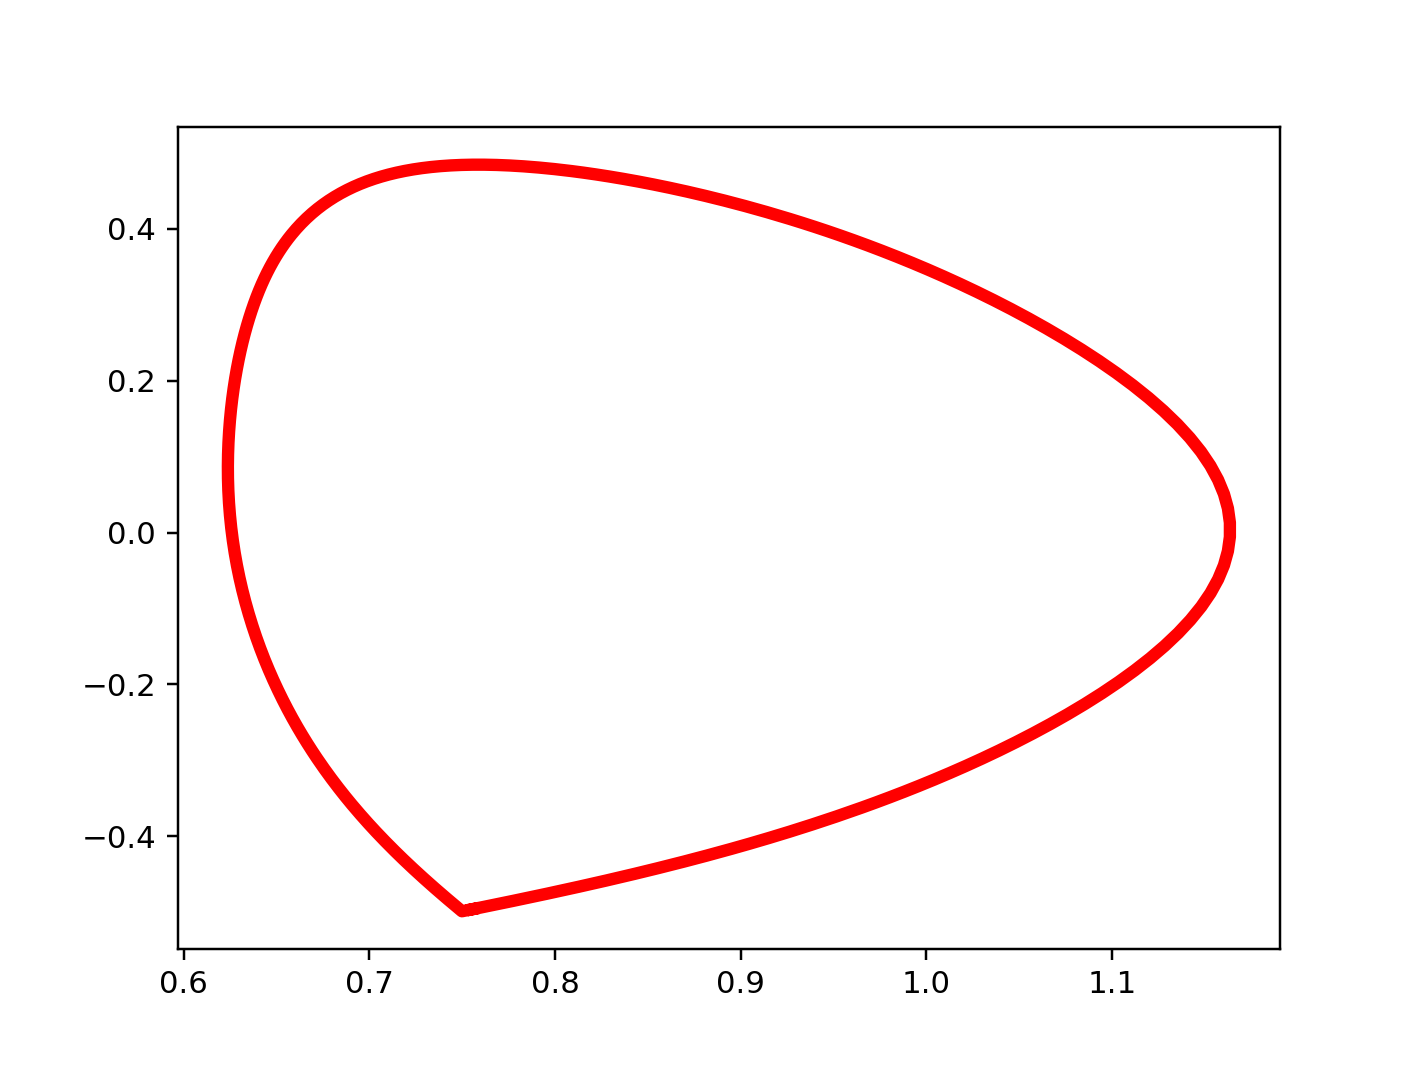

In [190]:

eq.plot_overview()
plot(t.R, t.Z, lw=1, color="r")
plot(*xp, "+")
figure()
plot(t.R, t.Z, lw=4, color="r")

In [78]:
xp = eq._x_point


SyntaxError: EOL while scanning string literal (<ipython-input-78-0fc5805fc230>, line 1)

In [83]:
g.mesh()[1].shape

(2000, 1000)

In [92]:
a = np.ones(5)
b = np.ones(5)*2
a @ b

10.0

In [181]:
print(rs.shape)
rs = np.hstack((rs[-1], rs))
print(rs.shape)

(907,)
(908,)
